In [55]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import wget
import numpy as np
from PIL import Image
import mxnet as mx
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

In [27]:
# Download Data
#path='http://data.mxnet.io/models/imagenet-11k/'
#wget.download(path+'resnet-152/resnet-152-symbol.json')
#wget.download(path+'resnet-152/resnet-152-0000.params')
#wget.download(path+'synset.txt')

In [28]:
# Load labels
with open('synset.txt', 'r') as f:
    synsets = [l.rstrip() for l in f]

sym, arg_params, aux_params = mx.model.load_checkpoint('resnet-152', 0)

In [29]:
# Create model
mod = mx.mod.Module(symbol=sym, context=mx.cpu())
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))])
mod.set_params(arg_params, aux_params)

In [30]:
def get_image(url):
    filename = wget.download(url)
    img = cv2.imread(filename)
    if img is None:
        print('failed to download ' + url)
    return filename

In [58]:
def predict(filename, mod, synsets):
    
    # Load image and resize    
    img = Image.open(filename).resize((224, 224), Image.ANTIALIAS)
    
    # Show image
    plt.imshow(img)
    plt.axis('off')

    img_np = np.swapaxes(img, 0, 2)
    img_np = np.swapaxes(img_np, 1, 2) 
    img_np = img_np[np.newaxis, :] 
    
    mod.forward(Batch([mx.nd.array(img_np)]))
    prob = mod.get_outputs()[0].asnumpy()
    prob = np.squeeze(prob)

    a = np.argsort(prob)[-1]    
    predicted_category = " ".join(synsets[a].split(" ")[1:])
    print(predicted_category)

kitten, kitty


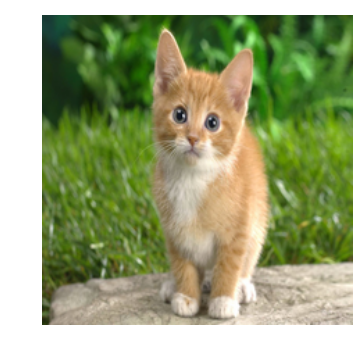

In [59]:
url = 'http://writm.com/wp-content/uploads/2016/08/Cat-hd-wallpapers.jpg'
predict(get_image(url), mod, synsets)